ANNET BALINABYO
REG NO.2022/DCSE/010/SS

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
import sklearn as sklearn
%matplotlib inline

# solution to question 1

In [2]:
# loading the data from csv file to a Pandas DataFrame
dataset = pd.read_csv("data/exam1.csv");
dataset

,Country Code,TableName,IncomeGroup,PopDensity_2018,Confirmed Cases,Deaths,Mortality Rate,Population_2019,GDP_2019,GDP_per_cap_2019,Main Leader Gender,Any Leader Gender,Avg Temp,Normalized Cases,Normalized Deaths
0,AFG,Afghanistan,Low income,56.937760,39192,1453,3.707389,38041754,1.910135e+10,2293.551684,M,M,12.60,0.001030,3.820000e-05
1,AGO,Angola,Lower middle income,24.713052,4672,171,3.660103,31825295,9.463542e+10,6929.678158,M,M,21.55,0.000147,5.370000e-06
2,ALB,Albania,Upper middle income,104.612263,13153,375,2.851061,2854191,1.527808e+10,14495.078510,M,M,11.40,0.004608,1.313860e-04
3,AND,Andorra,High income,163.842553,1836,53,2.886710,77142,3.154058e+09,NaN,M,M,7.60,0.023800,6.870450e-04
4,ARE,United Arab Emirates,High income,135.609110,90618,411,0.453552,9770529,4.211420e+11,69900.877850,M,M,27.00,0.009275,4.210000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,VNM,Vietnam,Lower middle income,308.125246,1069,35,3.274088,96462106,2.619210e+11,8374.444328,M,M,24.45,0.000011,3.630000e-07
178,YEM,"Yemen, Rep.",Low income,53.977853,2030,587,28.916256,29161922,NaN,NaN,M,M,23.85,0.000070,2.010000e-05
179,ZAF,South Africa,Upper middle income,47.630120,669498,16376,2.446012,58558270,3.514320e+11,12999.120260,M,M,17.75,0.011433,2.796530e-04
180,ZMB,Zambia,Lower middle income,23.341479,14612,332,2.272105,17861030,2.306472e+10,3623.699395,M,M,21.40,0.000818,1.860000e-05


In [3]:
#getting the colums in the exam1 dataset
dataset.columns

Index(['Country Code', 'TableName', 'IncomeGroup', 'PopDensity_2018',
       'Confirmed Cases', 'Deaths', 'Mortality Rate', 'Population_2019',
       'GDP_2019', 'GDP_per_cap_2019', 'Main Leader Gender',
       'Any Leader Gender', 'Avg Temp', 'Normalized Cases',
       'Normalized Deaths'],
      dtype='object')

In [6]:
dataset.head()

,Country Code,TableName,IncomeGroup,PopDensity_2018,Confirmed Cases,Deaths,Mortality Rate,Population_2019,GDP_2019,GDP_per_cap_2019,Main Leader Gender,Any Leader Gender,Avg Temp,Normalized Cases,Normalized Deaths
0,AFG,Afghanistan,Low income,56.937760,39192,1453,3.707389,38041754,1.910135e+10,2293.551684,M,M,12.60,0.001030,0.000038
1,AGO,Angola,Lower middle income,24.713052,4672,171,3.660103,31825295,9.463542e+10,6929.678158,M,M,21.55,0.000147,0.000005
2,ALB,Albania,Upper middle income,104.612263,13153,375,2.851061,2854191,1.527808e+10,14495.078510,M,M,11.40,0.004608,0.000131
3,AND,Andorra,High income,163.842553,1836,53,2.886710,77142,3.154058e+09,NaN,M,M,7.60,0.023800,0.000687
4,ARE,United Arab Emirates,High income,135.609110,90618,411,0.453552,9770529,4.211420e+11,69900.877850,M,M,27.00,0.009275,0.000042


In [7]:
#describing the dataset
dataset.describe()

,PopDensity_2018,Confirmed Cases,Deaths,Mortality Rate,Population_2019,GDP_2019,GDP_per_cap_2019,Avg Temp,Normalized Cases,Normalized Deaths
count,178.000000,1.820000e+02,182.000000,182.000000,1.820000e+02,1.690000e+02,168.000000,179.000000,182.000000,182.000000
mean,209.578681,1.798681e+05,5453.186813,2.552053,4.176762e+07,5.037484e+11,22175.663497,18.511117,0.005142,0.000126
std,642.276577,7.728216e+05,21079.533796,2.807438,1.494774e+08,2.060972e+12,22028.464791,8.179984,0.007289,0.000208
min,2.040609,1.900000e+01,0.000000,0.000000,3.386000e+04,4.290166e+08,782.816589,-5.100000,0.000003,0.000000
25%,37.143092,2.930250e+03,50.000000,1.063698,2.689939e+06,1.282700e+10,5398.131919,10.625000,0.000540,0.000008
50%,83.949492,1.337950e+04,228.000000,2.004451,9.758033e+06,4.731962e+10,14747.947505,21.850000,0.002313,0.000038
75%,204.487818,7.642675e+04,1450.000000,3.071983,3.040490e+07,2.619210e+11,32413.601215,25.325000,0.006527,0.000135
max,7952.998418,7.078039e+06,204486.000000,28.916256,1.397715e+09,2.137440e+13,121292.739300,28.290000,0.044084,0.001240


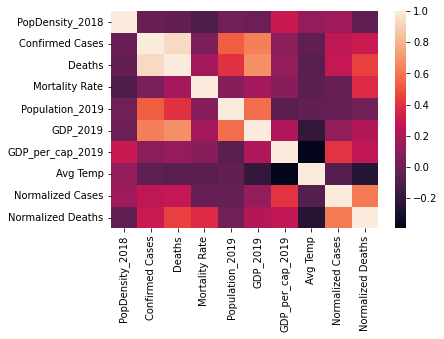

In [69]:
#data visualization
#building the correlation matrix
sns.heatmap(dataset.corr());

In [9]:
#getting the values of the GDP_2019 from the dataset
a = dataset.loc[:,'GDP_2019']
a

0      1.910135e+10
1      9.463542e+10
2      1.527808e+10
3      3.154058e+09
4      4.211420e+11
           ...     
177    2.619210e+11
178             NaN
179    3.514320e+11
180    2.306472e+10
181    2.144076e+10
Name: GDP_2019, Length: 182, dtype: float64

In [10]:
#getting the values of Deaths from the dataset
b = dataset.loc[:,'Deaths']
b

0       1453
1        171
2        375
3         53
4        411
       ...  
177       35
178      587
179    16376
180      332
181      227
Name: Deaths, Length: 182, dtype: int64

Text(0.5, 1.0, 'scatter plot of GDP_2019 against Deaths')

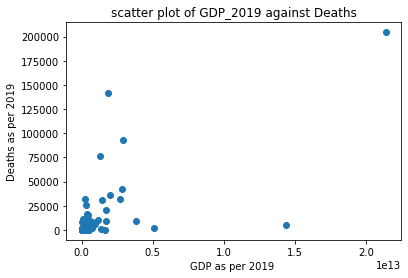

In [12]:
#plotting a scatter plot of 
plt.plot(a,b,'o');
plt.xlabel("GDP as per 2019 ")
plt.ylabel('Deaths as per 2019')
plt.title("scatter plot of GDP_2019 against Deaths")

In [ ]:
#relationshi

# solution to question 2

In [13]:
# loading the data from csv file to a Pandas DataFrame
data = pd.read_csv("data/taxi.csv")
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,7/15/2019 16:27,7/15/2019 16:44,3,2.02,1,N,186,233,1,12.0,1.0,0.5,4.08,0.0,0.3,20.38,2.5
1,2,7/17/2019 20:26,7/17/2019 20:40,6,1.59,1,N,141,161,2,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5
2,2,7/6/2019 16:01,7/6/2019 16:10,1,1.69,1,N,246,249,2,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5
3,1,7/18/2019 22:32,7/18/2019 22:35,1,0.90,1,N,229,141,1,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
4,2,7/19/2019 14:54,7/19/2019 15:19,1,4.79,1,N,237,107,1,19.5,0.0,0.5,5.70,0.0,0.3,28.50,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,1/18/2019 8:42,1/18/2019 8:56,1,1.18,1,N,43,237,1,10.0,0.0,0.5,2.16,0.0,0.3,12.96,0.0
196,1,1/19/2019 4:34,1/19/2019 4:43,1,2.30,1,N,148,234,1,9.5,0.5,0.5,2.15,0.0,0.3,12.95,0.0
197,2,1/5/2019 10:37,1/5/2019 10:42,1,0.83,1,N,237,263,1,5.0,0.0,0.5,1.16,0.0,0.3,6.96,0.0
198,2,1/23/2019 10:36,1/23/2019 10:44,2,1.12,1,N,144,113,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,0.0


In [14]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [15]:
d = data.loc[:,'total_amount']
d

0      20.38
1      13.80
2      11.80
3       9.95
4      28.50
       ...  
195    12.96
196    12.95
197     6.96
198     7.80
199    12.30
Name: total_amount, Length: 200, dtype: float64

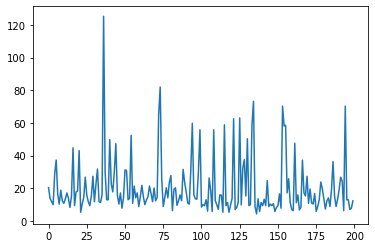

In [79]:
plt.plot(d)

In [16]:
#importing the empiricaldist lidrary and Cdf from the empiricaldist
import empiricaldist
from empiricaldist import Cdf

In [17]:
#importing norm from scipy.stats model
from scipy.stats import norm

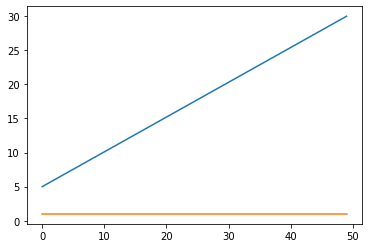

In [20]:
k =np.linspace(5,30)
j = norm(0,1).cdf(k)
plt.plot(k);
plt.plot(j);

In [73]:
#computting the mean
k.mean()

17.5

In [74]:
# the standard deviation
k.std()

7.362688617174395

# solution to question 2(b)

In [75]:
#creating an array
array = np.linspace(5,30)
array

array([ 5.        ,  5.51020408,  6.02040816,  6.53061224,  7.04081633,
        7.55102041,  8.06122449,  8.57142857,  9.08163265,  9.59183673,
       10.10204082, 10.6122449 , 11.12244898, 11.63265306, 12.14285714,
       12.65306122, 13.16326531, 13.67346939, 14.18367347, 14.69387755,
       15.20408163, 15.71428571, 16.2244898 , 16.73469388, 17.24489796,
       17.75510204, 18.26530612, 18.7755102 , 19.28571429, 19.79591837,
       20.30612245, 20.81632653, 21.32653061, 21.83673469, 22.34693878,
       22.85714286, 23.36734694, 23.87755102, 24.3877551 , 24.89795918,
       25.40816327, 25.91836735, 26.42857143, 26.93877551, 27.44897959,
       27.95918367, 28.46938776, 28.97959184, 29.48979592, 30.        ])

In [77]:
q = norm(18,7).cdf(array)
q

array([0.03164542, 0.03719099, 0.04350639, 0.05066039, 0.05872142,
       0.06775638, 0.07782931, 0.08899998, 0.10132241, 0.11484337,
       0.12960087, 0.14562268, 0.162925  , 0.18151121, 0.20137086,
       0.2224788 , 0.24479468, 0.26826269, 0.29281159, 0.31835519,
       0.34479302, 0.37201147, 0.39988518, 0.42827876, 0.45704873,
       0.48604568, 0.51511664, 0.54410744, 0.57286519, 0.60124068,
       0.62909072, 0.65628028, 0.68268444, 0.70819008, 0.73269731,
       0.7561205 , 0.77838903, 0.79944771, 0.8192568 , 0.83779177,
       0.85504271, 0.87101356, 0.88572099, 0.89919322, 0.91146863,
       0.92259431, 0.93262454, 0.94161928, 0.94964273, 0.95676187])

# solution to question 2(c)

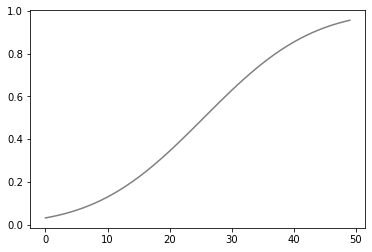

In [78]:
#plotting normal CDF with gray
plt.plot(q,color="gray");

# solution to question 4

In [21]:
#V: the new balance
#P: the principal ($2100)
#r: the rate (3.4%)
#n: the number of times it is compounded (4)
#t: the time (7years)
P = 2100 
r = 0.034 
t = 7
n = 4
V = P*(1+r/n)**(n*t)
V = 2100*(1+0.034/4)**((4*7)) #this will compute the balance after 7years.
V

2661.6108980682593

# solution to question 4(a)

In [22]:
# getting the total value after 7 years
P = 2100
r = 0.034
t = 7
n = 2
V = P*(1+r/n)**(n*t)
V = 2100*(1+0.034/2)**(2*7)
V

2658.965091277534

# solution to question 4(b)

In [25]:
#getting the value if interest is compounded continuously.
P = 2100
r = 0.034
t = 7
V = P**(r*t)
V = (2100)**(0.034*7)
V

6.175728457877729

# solution to question 5

In [26]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv("data/taxi.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,7/15/2019 16:27,7/15/2019 16:44,3,2.02,1,N,186,233,1,12.0,1.0,0.5,4.08,0.0,0.3,20.38,2.5
1,2,7/17/2019 20:26,7/17/2019 20:40,6,1.59,1,N,141,161,2,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5
2,2,7/6/2019 16:01,7/6/2019 16:10,1,1.69,1,N,246,249,2,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5
3,1,7/18/2019 22:32,7/18/2019 22:35,1,0.90,1,N,229,141,1,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
4,2,7/19/2019 14:54,7/19/2019 15:19,1,4.79,1,N,237,107,1,19.5,0.0,0.5,5.70,0.0,0.3,28.50,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,1/18/2019 8:42,1/18/2019 8:56,1,1.18,1,N,43,237,1,10.0,0.0,0.5,2.16,0.0,0.3,12.96,0.0
196,1,1/19/2019 4:34,1/19/2019 4:43,1,2.30,1,N,148,234,1,9.5,0.5,0.5,2.15,0.0,0.3,12.95,0.0
197,2,1/5/2019 10:37,1/5/2019 10:42,1,0.83,1,N,237,263,1,5.0,0.0,0.5,1.16,0.0,0.3,6.96,0.0
198,2,1/23/2019 10:36,1/23/2019 10:44,2,1.12,1,N,144,113,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,0.0


In [27]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [28]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000
mean,1.605000,1.560000,3.72935,1.055000,162.26000,169.080000,1.285000,15.402500,0.790000,0.497500,2.013900,0.465700,3.000000e-01,20.154350,1.125000
std,0.519929,1.222239,4.71901,0.335466,64.62985,67.869618,0.452547,15.172931,1.048282,0.035355,2.292065,1.672997,1.057359e-15,17.072769,1.246855
min,1.000000,0.000000,0.16000,1.000000,4.00000,13.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,4.300000,0.000000
25%,1.000000,1.000000,1.12750,1.000000,132.00000,131.250000,1.000000,7.000000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,10.215000,0.000000
50%,2.000000,1.000000,1.88000,1.000000,161.00000,164.000000,1.000000,9.500000,0.500000,0.500000,1.650000,0.000000,3.000000e-01,14.120000,0.000000
75%,2.000000,2.000000,3.82000,1.000000,230.25000,236.000000,2.000000,17.000000,1.000000,0.500000,2.712500,0.000000,3.000000e-01,22.552500,2.500000
max,4.000000,6.000000,22.00000,5.000000,264.00000,265.000000,2.000000,120.000000,4.500000,0.500000,14.640000,10.700000,3.000000e-01,125.300000,2.500000


In [29]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,7/15/2019 16:27,7/15/2019 16:44,3,2.02,1,N,186,233,1,12.0,1.0,0.5,4.08,0.0,0.3,20.38,2.5
1,2,7/17/2019 20:26,7/17/2019 20:40,6,1.59,1,N,141,161,2,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5
2,2,7/6/2019 16:01,7/6/2019 16:10,1,1.69,1,N,246,249,2,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5
3,1,7/18/2019 22:32,7/18/2019 22:35,1,0.90,1,N,229,141,1,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
4,2,7/19/2019 14:54,7/19/2019 15:19,1,4.79,1,N,237,107,1,19.5,0.0,0.5,5.70,0.0,0.3,28.50,2.5


In [45]:
g = df.loc[:,'tip_amount']
g

0      4.08
1      0.00
2      0.00
3      1.65
4      5.70
       ... 
195    2.16
196    2.15
197    1.16
198    0.00
199    1.00
Name: tip_amount, Length: 200, dtype: float64

Text(0, 0.5, 'y-axis')

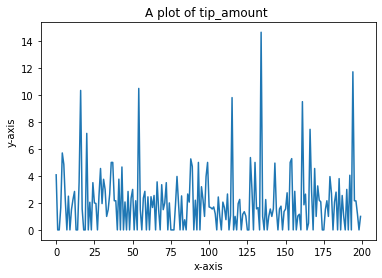

In [64]:
plt.plot(g);
plt.title("A plot of tip_amount ")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

In [55]:
h = df.loc[:,'total_amount']
h

0      20.38
1      13.80
2      11.80
3       9.95
4      28.50
       ...  
195    12.96
196    12.95
197     6.96
198     7.80
199    12.30
Name: total_amount, Length: 200, dtype: float64

Text(0, 0.5, 'y-axis')

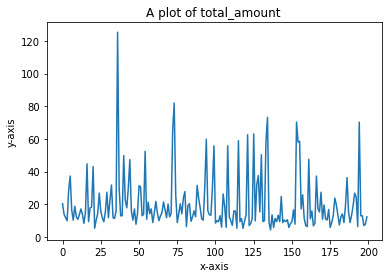

In [63]:
plt.plot(h);
plt.title("A plot of total_amount ")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

In [46]:
#importing LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [47]:
#importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [48]:
# Split the data into a training and test set
g_train, g_test, h_train, h_test = train_test_split(g, h)

print(f'Shape g_train: {g_train.shape}')
print(f'Shape h_train: {h_train.shape}')
print(f'Shape g_test: {g_test.shape}')
print(f'Shape h_test: {h_test.shape}')

Shape g_train: (150,)
Shape h_train: (150, 1)
Shape g_test: (50,)
Shape h_test: (50, 1)


In [49]:
#training the model
train = LinearRegression(fit_intercept=True)
train

LinearRegression()

In [50]:
#Arranging data into a features matrix (g)
g = g[:,np.newaxis]
g

C:\Users\HP\AppData\Local\Temp\ipykernel_13244\3492705455.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  g = g[:,np.newaxis]


array([[ 4.08],
       [ 0.  ],
       [ 0.  ],
       [ 1.65],
       [ 5.7 ],
       [ 4.86],
       [ 2.14],
       [ 0.  ],
       [ 2.5 ],
       [ 0.  ],
       [ 1.5 ],
       [ 2.26],
       [ 2.85],
       [ 0.  ],
       [ 0.  ],
       [ 3.54],
       [10.33],
       [ 1.55],
       [ 0.  ],
       [ 0.  ],
       [ 7.15],
       [ 0.  ],
       [ 2.05],
       [ 0.  ],
       [ 3.5 ],
       [ 2.  ],
       [ 1.96],
       [ 0.  ],
       [ 2.55],
       [ 4.55],
       [ 1.95],
       [ 3.75],
       [ 3.  ],
       [ 1.  ],
       [ 1.5 ],
       [ 2.66],
       [ 5.  ],
       [ 5.  ],
       [ 2.16],
       [ 2.16],
       [ 0.  ],
       [ 3.76],
       [ 0.  ],
       [ 4.66],
       [ 0.  ],
       [ 2.07],
       [ 0.  ],
       [ 2.85],
       [ 0.  ],
       [ 2.36],
       [ 3.  ],
       [ 0.  ],
       [ 2.16],
       [ 0.  ],
       [10.48],
       [ 1.5 ],
       [ 0.  ],
       [ 2.36],
       [ 2.86],
       [ 0.  ],
       [ 2.45],
       [ 0.  ],
       [

In [51]:
#getting the shape of array g
g.shape

(200, 1)

In [56]:
#Arranging data into a features vector (h)
h = h[:,np.newaxis]
h

C:\Users\HP\AppData\Local\Temp\ipykernel_13244\1655419898.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  h = h[:,np.newaxis]


array([[ 20.38],
       [ 13.8 ],
       [ 11.8 ],
       [  9.95],
       [ 28.5 ],
       [ 37.28],
       [ 16.44],
       [ 10.3 ],
       [ 18.8 ],
       [ 12.3 ],
       [ 10.8 ],
       [ 13.56],
       [ 17.15],
       [ 13.8 ],
       [  8.3 ],
       [ 15.34],
       [ 44.75],
       [  9.35],
       [ 17.8 ],
       [ 18.3 ],
       [ 43.07],
       [  5.3 ],
       [ 10.35],
       [ 14.3 ],
       [ 26.8 ],
       [ 15.8 ],
       [ 11.76],
       [  9.3 ],
       [ 15.35],
       [ 27.35],
       [ 11.75],
       [ 22.55],
       [ 31.8 ],
       [ 11.8 ],
       [ 11.3 ],
       [ 15.96],
       [125.3 ],
       [ 29.8 ],
       [ 12.96],
       [ 12.96],
       [ 49.8 ],
       [ 22.56],
       [ 17.8 ],
       [ 29.91],
       [ 47.3 ],
       [ 15.87],
       [ 10.3 ],
       [ 17.15],
       [  7.8 ],
       [ 14.16],
       [ 31.3 ],
       [ 30.8 ],
       [ 12.96],
       [ 13.8 ],
       [ 52.4 ],
       [ 10.8 ],
       [ 21.3 ],
       [ 14.16],
       [ 17.16

In [57]:
#getting the shape of array h
h.shape

(200, 1)

In [58]:
#fitting the model
train.fit(g,h)

LinearRegression()

In [59]:
## getting the coeficient of the model
train.coef_

array([[3.68648322]])

In [60]:
#getting the intercept of the model
train.intercept_ 

array([12.73014144])

Text(0, 0.5, 'total_amount')

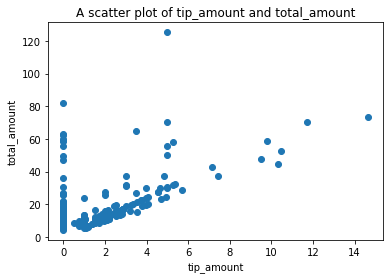

In [65]:
plt.scatter(g,h)
plt.title('A scatter plot of tip_amount and total_amount')
plt.xlabel('tip_amount')
plt.ylabel('total_amount')

In [67]:
#importing statsmodels.formula.api library
import statsmodels.formula.api as smf

In [68]:
#simple linear regression
results = smf.ols('tip_amount ~ total_amount', data = df).fit()
results.params

Intercept       0.674757
total_amount    0.066444
dtype: float64

In [71]:
x = df.loc[:,'trip_distance']
x

0      2.02
1      1.59
2      1.69
3      0.90
4      4.79
       ... 
195    1.18
196    2.30
197    0.83
198    1.12
199    2.41
Name: trip_distance, Length: 200, dtype: float64

In [72]:
y = df.loc[:,'fare_amount']
y

0      12.0
1      10.0
2       8.5
3       4.5
4      19.5
       ... 
195    10.0
196     9.5
197     5.0
198     7.0
199    10.5
Name: fare_amount, Length: 200, dtype: float64